In [5]:
#Importing the necessary packages/libraries

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as r
import math as m
import time as t
import unittest, sys

In [6]:
#Kernighan Lin Algorithm

class Kernighan_Lin():
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = edges
        
    def partition(self):
        """Creates a bisection by dividing the given set of nodes into two subsets"""
        
        ##We make the partition 'A' smaller than partition 'B' in case we have odd numbered nodes
        l = m.floor(len(self.nodes)/2)
        partition_label = {}
        
        for i in range(l):
            partition_label[self.nodes[i]] = "A"
        for i in range(l, len(self.nodes)):
            partition_label[self.nodes[i]] = "B"
        return partition_label
    
    def external_cost(self, i, B_i):
        """Computes the external cost of the nodes, which is the sum of the edge weight of a given node from the subset it belongs to the node in another subset if they are connected"""
        
        external_cost = 0
        for j in range(len(B_i)):
                if (i, B_i[j]) in self.edges:
                    external_cost += self.edges[(i, B_i[j])]
                elif (B_i[j], i) in self.edges:
                    external_cost += self.edges[(B_i[j], i)]
                else:
                    external_cost += 0
        return external_cost
    
    def internal_cost(self, i, A_i):
        """Computes the internal cost of the nodes, which is the sum of the edge weight of a given node from the subset it belongs to the node in the same subset if they are connected"""
        
        internal_cost = 0
        for k in range(len(A_i)):
                if (i, A_i[k]) in self.edges:
                    internal_cost += self.edges[(i, A_i[k])]
                elif (A_i[k], i) in self.edges:
                    internal_cost += self.edges[(A_i[k], i)]
                else:
                    internal_cost += 0
        return internal_cost
            
    def gain(self, A_i, B_i):
        """Computes the maximum gain achieved by swaping the two nodes"""
        G_c = {}
        for i in range(len(A_i)):
            for j in range(len(B_i)):
                I_i = self.internal_cost(A_i[i], A_i)
                I_j = self.internal_cost(B_i[j], B_i)
                E_i = self.external_cost(A_i[i], B_i)
                E_j = self.external_cost(B_i[j], A_i)
                D_i = E_i - I_i
                D_j = E_j - I_j
                
                if (A_i[i], B_i[j]) in self.edges:
                    c = self.edges[(A_i[i], B_i[j])]
                elif (B_i[j], A_i[i]) in self.edges:
                    c = self.edges[(B_i[j], A_i[i])]
                else:
                    c = 0
                G_c[(A_i[i], B_i[j])] = (D_i + D_j - 2*c)      
        return G_c

    def bisection(self):
        """It creates the optimal bisection, and repeats until the gain achieved by swapping the node is greater than zero"""
        A_f = []
        B_f = []
        G_f = []
        
        A_ini = []
        B_ini = []
        partition_label = self.partition()
        for i in range(len(self.nodes)):
            if (partition_label[i] == "A") and (self.nodes[i] not in A_f):
                A_ini.append(self.nodes[i])
            if (partition_label[i] == "B") and (self.nodes[i] not in B_f):
                B_ini.append(self.nodes[i])
                
        g_max_value = 1
            
        while g_max_value > 0:
            A_i = []
            B_i = []
            for i in range(len(self.nodes)):
                if (partition_label[i] == "A") and (self.nodes[i] not in A_f) and (self.nodes[i] not in B_f):
                    A_i.append(self.nodes[i])
                if (partition_label[i] == "B") and (self.nodes[i] not in A_f) and (self.nodes[i] not in B_f):
                    B_i.append(self.nodes[i])
            
            if len(A_i) > 0 and len(B_i) > 0:
                gain_dict = self.gain(A_i, B_i)
                g_max_key = max(gain_dict, key=gain_dict.get)
                g_max_value = gain_dict[g_max_key]

            else:
                g_max_value = -1
                
            if g_max_value <= 0:
                break
            
            else:
                if g_max_key[0] in A_i:
                    B_f.append(g_max_key[0])
                    A_i.remove(g_max_key[0])
                else:
                    A_f.append(g_max_key[0])
                    B_i.remove(g_max_key[0])
                
                if g_max_key[1] in B_i:
                    A_f.append(g_max_key[1])
                    B_i.remove(g_max_key[1])
                else:
                    B_f.append(g_max_key[1])
                    A_i.remove(g_max_key[1])
            
        for i in range(len(A_i)):
            A_f.append(A_i[i])
            
        for i in range(len(B_i)):
            B_f.append(B_i[i])
            
        partition_cost = 0
        
        for i in range(len(A_f)):
            for j in range(len(B_f)):
                if (A_f[i], B_f[j]) in self.edges:
                    partition_cost += self.edges[(A_f[i], B_f[j])]
                elif (B_f[j], A_f[i]) in self.edges:
                    partition_cost += self.edges[(B_f[j], A_f[i])]
                else:
                    continue
        
        print("Final partition A:", A_f)
        print("Final partition B:", B_f)
        print("Partition cost = ", partition_cost)
        
        return A_f, B_f, partition_cost    

In [7]:
#Exact/Brute-Force Method

class Naive_bisection():
    
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = edges
        
    def create_combinations(self):
        
        """Creates all possible combinations of a set of size = len(array)/2
            combinations('ABCD') --> AB AC AD BC BD CD
            combinations(range(3)) --> 01 02 12 """
                
        node_tuple = tuple(self.nodes)
        partition_size = m.floor(len(self.nodes)/2)
        if partition_size > len(self.nodes):
            raise Exception("Partition size cannot exceed number of elements in a set")
            return
        indices = list(range(partition_size))
        
        #first combination created by picking the first n nodes, where n is the partition size  
        yield (node_tuple[i] for i in indices)
        
        #Creating all possible combination/pair of nodes by iteerating over all indices
        while True:
            for i in reversed(range(partition_size)):
                if indices[i] != i + len(self.nodes) - partition_size:
                    break
            else:
                return
            indices[i] += 1
            for j in range(i+1, partition_size):
                indices[j] = indices[j-1] + 1
            yield tuple(node_tuple[i] for i in indices)
            
            
    def evaluate_combinations(self):
        
        """Calculates and compares cost of all the possible two way partitions. 
        Returns the minimum cost and the corresponding partitions"""
       
        min_cost = 0
        iteration = 0
        Partition_1 = []
        Partition_2 = []
        

        combinations = self.create_combinations()

        for combination in combinations:
    
            iteration += 1
            A = list(combination)
            B = list(set(self.nodes)-set(A))
            cost = 0
    
            for element_A in A:
                for element_B in B:
                    if (element_A,element_B) in self.edges:
                        cost += self.edges[(element_A,element_B)]
                    elif (element_B,element_A) in self.edges:
                        cost += self.edges[(element_B,element_A)]
                    else:
                        continue
            
            #minimum cost of partition and partitions updated after first iteration
            if iteration == 1:
                min_cost = cost
                Partition_1 = A
                Partition_2 = B
            
            #minimum cost and corresponding partitions updated if better solution found
            elif cost < min_cost:
                min_cost = cost
                Partition_1 = A
                Partition_2 = B
        
            else:
                continue    

        print("Final Partition A: ", Partition_1)
        print("Final Partition B: ", Partition_2)
        print("Cost of Partition: ", min_cost)
        
        return Partition_1, Partition_2, min_cost

In [8]:
class Test_Kernighan_Lin(unittest.TestCase):
    
    def test_partition(self):
        """Tests if the intial two-way partition is created by assigning the floor(first half nodes) to set A
        and the other half to the set B"""
        nodes = [0, 1, 2, 3, 4]
        edges = {(0,1): 4, (1,2): 8, (2,3): 10, (3,4): 5, (4,0): 8}
        kl = Kernighan_Lin(nodes, edges)
        self.assertEqual(kl.partition(),{0:"A",1:"A",2:"B",3:"B",4:"B"})
        
    def test_gain(self):
        """Tests if the gain in the cut cost for node swaps are calculated correctly"""
        nodes = [0, 1, 2, 3, 4]
        edges = {(0,1): 4, (1,2): 8, (2,3): 10, (3,4): 5, (4,0): 8}
        kl = Kernighan_Lin(nodes, edges)
        A_i = [0, 1]
        B_i = [2, 3, 4]
        self.assertEqual(kl.gain(A_i,B_i), {(0,2):2, (0,3):-11, (0,4):-9, (1,2):-14, (1,3):-11, (1,4):7})
        
    def test_bisection(self):
        """Tests for the final partitions created and the partition costs calculated"""
        nodes = [0, 1, 2, 3, 4]
        edges = {(0,1): 4, (1,2): 8, (2,3): 10, (3,4): 5, (4,0): 8}
        kl = Kernighan_Lin(nodes,edges)
        self.assertEqual(kl.bisection(),([4, 0], [1, 2, 3], 9))

In [9]:
class Test_Naive_bisection(unittest.TestCase):
    
    def test_combinations(self):
        """Tests if the all the possible balanced two-way partitions partitions are created correctly"""
        nodes = [0, 1, 2, 3, 4]
        edges = {(0,1): 4, (1,2): 8, (2,3): 10, (3,4): 5, (4,0): 8}
        nb = Naive_bisection(nodes,edges)
        comb = nb.create_combinations()
        pairs = []
        for pair in comb:
            pairs.append(pair)
        del pairs[0]
        self.assertEqual(pairs, [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
    
    
    def test_naive(self):
        """Tests for the final partitions created and the partition cpsts calculated"""
        nodes = [0, 1, 2, 3, 4]
        edges = {(0,1): 4, (1,2): 8, (2,3): 10, (3,4): 5, (4,0): 8}
        nb = Naive_bisection(nodes,edges)
        self.assertEqual(nb.evaluate_combinations(),([0,4],[1,2,3],9))

In [10]:
suite = unittest.TestLoader().loadTestsFromTestCase(Test_Kernighan_Lin)
unittest.TextTestRunner(verbosity=1).run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


Final partition A: [4, 0]
Final partition B: [1, 2, 3]
Partition cost =  9


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [11]:
suite = unittest.TestLoader().loadTestsFromTestCase(Test_Naive_bisection)
unittest.TextTestRunner(verbosity=1).run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


Final Partition A:  [0, 4]
Final Partition B:  [1, 2, 3]
Cost of Partition:  9


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [12]:
#Generating the random connected graph with random number of nodes and random number of edges

def Graph(n):
    ##Defining the Graph as 'G'
    G=nx.Graph()

    ##Defining the random number of total nodes 
    total_nodes = n

    ##Defining the initial empty dictinary of edges
    edges = {}

    ##making the graph connected by having 'n-1' number of edges and degree 2 of each node
    for i in range(total_nodes):
        if i < (total_nodes - 1):
            wt = r.randint(1, 10)
            G.add_edge(i, i+1, weight = wt)
            edges[(i, i+1)] = wt
        else:
            wt = r.randint(1, 10)
            G.add_edge(i, 0, weight = wt)
            edges[(i, 0)] = wt

    ##Specifying the number of extra edges to be added to the above graph
    ext_edges = r.randint(0, (total_nodes*(total_nodes - 1)*0.5 - total_nodes))

    ##Adding those edges
    for i in range(ext_edges):
        a = r.randint(0, total_nodes)
        b = r.randint(0, total_nodes)
        wt = r.randint(1, 10)
        if (a != b) == True and G.has_edge(a, b) == False:
            G.add_edge(a, b, weight = wt)
            edges[(a, b)] = wt

    ##Nodes list
    nodes = np.array(nx.nodes(G))
    
    print(edges)
    
    #nx.draw(G, with_labels = True)
    
    return nodes, edges

In [13]:
nodes, edges = Graph(5)

{(0, 1): 4, (1, 2): 4, (2, 3): 8, (3, 4): 5, (4, 0): 5, (0, 3): 3, (5, 4): 5, (2, 5): 2}


In [14]:
kl = Kernighan_Lin(nodes,edges)
kl.bisection()

Final partition A: [np.int64(3), np.int64(1), np.int64(2)]
Final partition B: [np.int64(0), np.int64(4), np.int64(5)]
Partition cost =  14


([np.int64(3), np.int64(1), np.int64(2)],
 [np.int64(0), np.int64(4), np.int64(5)],
 14)

In [15]:
nb = Naive_bisection(nodes,edges)
nb.evaluate_combinations()

Final Partition A:  [np.int64(0), np.int64(4), np.int64(5)]
Final Partition B:  [np.int64(1), np.int64(2), np.int64(3)]
Cost of Partition:  14


([np.int64(0), np.int64(4), np.int64(5)],
 [np.int64(1), np.int64(2), np.int64(3)],
 14)

In [16]:
kl_rt = [] #list to store run-time for kl-algorithm
na_rt = [] #list to store naive bisection run-time
v = [] #list to store number of nodes in the graph problem
cost_kl = [] #list to store cost of partition for KL-Algorithm
cost_na = [] #list to store cost of partition for Naive/Brute Force Approach

for i in range(3,10,2):
    print("Edges and corresponding weights for a graph with", i, "vertices")
    nodes, edges = Graph(i)
    print("\n")
    v.append(i)
    
    print("Partition Genetared using Kernighan-Lin Algorithm:")
    
    start_time_k = t.time()
    kl = Kernighan_Lin(nodes, edges)
    cost_kl.append(kl.bisection()[2])
    elapsed_time_k = t.time() - start_time_k
        
    kl_rt.append(elapsed_time_k)
    print("\n")
    
    print("Partition Genetared using Naive Approach/Brute Force:")
    
    start_time_n = t.time()
    nb = Naive_bisection(nodes,edges)
    cost_na.append(nb.evaluate_combinations()[2])
    elapsed_time_n = t.time() - start_time_n
        
    na_rt.append(elapsed_time_n)
    print("\n")
    print("******************************************************")

Edges and corresponding weights for a graph with 3 vertices
{(0, 1): 6, (1, 2): 10, (2, 0): 3}


Partition Genetared using Kernighan-Lin Algorithm:
Final partition A: [np.int64(0)]
Final partition B: [np.int64(1), np.int64(2)]
Partition cost =  9


Partition Genetared using Naive Approach/Brute Force:
Final Partition A:  [np.int64(0)]
Final Partition B:  [np.int64(1), np.int64(2)]
Cost of Partition:  9


******************************************************
Edges and corresponding weights for a graph with 5 vertices
{(0, 1): 3, (1, 2): 3, (2, 3): 7, (3, 4): 2, (4, 0): 9}


Partition Genetared using Kernighan-Lin Algorithm:
Final partition A: [np.int64(4), np.int64(0)]
Final partition B: [np.int64(1), np.int64(2), np.int64(3)]
Partition cost =  5


Partition Genetared using Naive Approach/Brute Force:
Final Partition A:  [np.int64(0), np.int64(4)]
Final Partition B:  [np.int64(1), np.int64(2), np.int64(3)]
Cost of Partition:  5


******************************************************
E

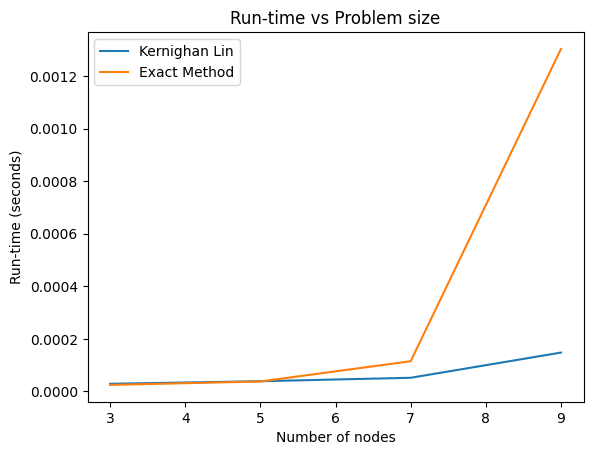

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(v, kl_rt, label = "Kernighan Lin")
plt.plot(v, na_rt, label = "Exact Method")

# naming the x axis 
plt.xlabel('Number of nodes') 

# naming the y axis 
plt.ylabel('Run-time (seconds)') 

# giving a title to my graph 
plt.title('Run-time vs Problem size') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('runtime.png', dpi=100)

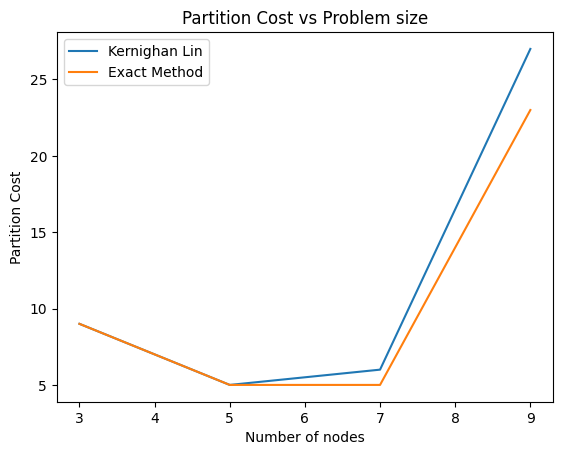

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(v, cost_kl, label = "Kernighan Lin")
plt.plot(v, cost_na, label = "Exact Method")

# naming the x axis 
plt.xlabel('Number of nodes') 

# naming the y axis 
plt.ylabel('Partition Cost') 

# giving a title to my graph 
plt.title('Partition Cost vs Problem size') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('cost.png', dpi=100)